### Accessible Learning Analytics

### Import packages

In [1]:
# #Unhide if you run the code from Google Colab (Select all line beloe, then (Ctrl + /))

# !pip install graphviz
# !apt-get install graphviz


In [2]:

import io
import numpy as np
import pandas as pd
import datetime
import re 
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

import graphviz 



## Variables


In [3]:
#@title Variables

#@markdown Semester Start Date:
StartDate = '2017-09-10' #@param {type:"date"}
StartDate = pd.to_datetime(StartDate)

#@markdown Semester End Date:
EndDate = '2018-01-15' #@param {type:"date"}
EndDate = pd.to_datetime(EndDate)

# Course Start Date ex: '2017-08-01'
# StartDate = pd.to_datetime('2017-09-01')

# Course End Date ex: '2017-08-01'
# EndDate   = pd.to_datetime('2018-01-20')

#@markdown Grade A Start From:
A_Start   = 75 #@param {type:"number"}

#@markdown Grade B Start From:
B_Start   = 45 #@param {type:"number"}

#@markdown Final grade Column name in Grades file:
FGradeCol = 'FInalGrade' #@param {type:"string"}

#@markdown Student name in Grade file:
StdCol    = 'newID' #@param {type:"string"}

#@markdown Student Activity File Name  
#@markdown -- Select from list or Type
ActivityFile = 'Activity_Obfuscated.csv' 

#@markdown Student Grades File Name
#@markdown -- Select from list or Type
GradeFile    = 'Grade_Obfuscated.csv' 

#@markdown Student Grades File Name
#@markdown -- Please use the semicolon **";"** as your separator between names.
InstructorNames= "" #@param {type:"string"}
InstructorNames= pd.Series(InstructorNames).str.split(";")

### Import Data

**Import activity load:**

In [4]:
# Load the activity file
Activity = pd.read_csv(ActivityFile,encoding = "latin-1",low_memory = False)



**Let's see what the data set contains:**

In [5]:
Activity.head(10)

,Time,User full name,Affected user,Event context,Component,Event name,Description,IP address,Origin
0,"21 Mar, 17:40",A09,-,File: Lecture 5 and 6: Data Preparation,File,Course module viewed,The user with id '8358' viewed the 'resource' ...,10.30.0.20,web
1,"21 Mar, 17:38",A09,-,File: Lecture 5 and 6: Data Preparation,File,Course module viewed,The user with id '8358' viewed the 'resource' ...,10.30.0.20,web
2,"21 Mar, 17:38",A09,-,Course: COMP H4030 - Data Analytics,System,Course viewed,The user with id '8358' viewed the course with...,10.30.0.20,web
3,"31 Jan, 14:21",A09,-,File: labsheet #3-classification,File,Course module viewed,The user with id '8358' viewed the 'resource' ...,10.30.0.20,web
4,"31 Jan, 14:21",A09,-,Course: COMP H4030 - Data Analytics,System,Course viewed,The user with id '8358' viewed the course with...,10.30.0.20,web
5,"31 Jan, 14:12",A09,-,File: labsheet #3-classification,File,Course module viewed,The user with id '8358' viewed the 'resource' ...,10.30.0.20,web
6,"31 Jan, 14:11",A09,-,File: Assessment - Analyse a dataset 2017,File,Course module viewed,The user with id '8358' viewed the 'resource' ...,10.30.0.20,web
7,"31 Jan, 14:11",A09,-,Course: COMP H4030 - Data Analytics,System,Course viewed,The user with id '8358' viewed the course with...,10.30.0.20,web
8,"10 Jan, 10:34",A09,-,File: Lecture7-prediction,File,Course module viewed,The user with id '8358' viewed the 'resource' ...,10.30.0.20,web
9,"10 Jan, 10:34",A09,-,Course: COMP H4030 - Data Analytics,System,Course viewed,The user with id '8358' viewed the course with...,10.30.0.20,web


In [6]:
# Number of records in the activity log.
len(Activity)

5876

In [7]:
# Generates descriptive statistics 
Activity.describe().transpose()

,count,unique,top,freq
Time,5876,2708,"29 Sep, 10:19",44
User full name,5828,30,A02,502
Affected user,5876,1,-,5876
Event context,5876,64,Course: COMP H4030 - Data Analytics,1914
Component,5876,10,File,2404
Event name,5876,17,Course module viewed,3178
Description,5876,2018,The user with id '8306' viewed the course with...,145
IP address,5876,153,10.30.0.20,3089
Origin,5876,2,web,5722


Attribute Information: 


*   **Affected user:** It contains the name of the user if the action is related to them.
*  **Time:** It contains the date, month and time stamp of the log entry when it was recorded. (Year infomration may or may not be included)
*  **User full name:** Name of the user is listed in this column.
*  **Event context:** It displays the name of the activity or resource. Ex: Lecture 4, Lab2 Upload
*  **Component:** It displays the type of the activity or resource. Ex: File, System, Assignment, Quiz ...
*  **Event name:** It displays the event name in relation to users' action. There are four actions that a user can do in Moodle - Create, View, Update and Delete.
*  **Description:** It contains descriptive information about the action performed by the user.
*  **IP address:** Shows the IP address of the user.
*  **Origin:** It indicates whether the user performed an action using a desktop/laptop or mobile. Any user activity from a mobile device will be recorded as 'ws'.

Reference: https://moodle.info.yorku.ca/instructor_resources/instructors/training/logs/#squelch-taas-toggle-shortcode-content-0






In [8]:
# Load the grade file

Grades = pd.read_csv(GradeFile,encoding = "latin-1",low_memory = False)



In [9]:
# Number of records in the grade file

len(Grades)

30

In [10]:
# Generates descriptive statistics

Grades.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CAgrade,30.0,58.576667,26.559948,0.0,49.525,66.50,79.775,88.7
ExamGrade,30.0,40.433333,24.189886,0.0,26.000,39.00,63.250,78.0
FInalGrade,30.0,47.840000,22.694471,0.0,35.825,51.35,65.275,80.5


# Load Functions Notebook

In [11]:
%run functions.ipynb

## Clean Data

In [12]:
# Remove columns with only one value 

Activity = Activity[[c for c
                     in list(Activity)
                     if len(Activity[c].unique()) > 1]]  


Activity.describe().transpose()

,count,unique,top,freq
Time,5876,2708,"29 Sep, 10:19",44
User full name,5828,30,A02,502
Event context,5876,64,Course: COMP H4030 - Data Analytics,1914
Component,5876,10,File,2404
Event name,5876,17,Course module viewed,3178
Description,5876,2018,The user with id '8306' viewed the course with...,145
IP address,5876,153,10.30.0.20,3089
Origin,5876,2,web,5722


In [13]:
# Remove all rows with instructor name in the InstructorNames list

originalLength = len(Activity)

Activity = Activity[~Activity['User full name'].isin(InstructorNames)]

print ("Current length: " + str(len(Activity)) + " ... " + str(originalLength - len(Activity)) + " Rows Deleted.")



Current length: 5876 ... 0 Rows Deleted.


### Fix Time Column

1.   Assign DataTime data type to Time column (if not)

2.   Add the year value (if not)


In [14]:
fixTimeColumn()

,Data Type
Time,datetime64[ns]
User full name,object
Event context,object
Component,object
Event name,object
Description,object
IP address,object
Origin,object


### Remove activity outside semester start and end dates range

In [15]:
mask = (Activity['Time'] >= StartDate) & (Activity['Time'] <= EndDate)

Activity = Activity.loc[mask]

len(Activity)

5732

# **What we have in this course log file:**

 **Or Check Activity Patterns and Combinations:**



- How? 
Hide changing values in the Description column to get all unique pattern of activity in your log.

In [16]:
# Coud takes few minutes depends on the course log size.
findPattern(  ) 

0
Component             Event name                   Pattern_Description                                     
File                  Course module viewed         The user with  '#' viewed the 'resource' activi...  2330
Folder                Course module viewed         The user with  '#' viewed the 'folder' activity...   329
Forum                 Course module viewed         The user with  '#' viewed the 'forum' activity ...     4
                      Discussion viewed            The user with  '#' has viewed the discussion wi...    18
Overview report       Grade overview report viewed The user with  '#' viewed the overview report i...     1
Page                  Course module viewed         The user with  '#' viewed the 'page' activity w...   102
Quiz                  Course module viewed         The user with  '#' viewed the 'quiz' activity w...   281
                      Quiz attempt reviewed        The user with  '#' has had their attempt with  ...   117
                      Quiz attempt started         The user with  '#' has started the attempt with...   104
                      Quiz attempt submitted       The user with  '#' has submitted the attempt wi...   104
                      Quiz attempt summary viewed  The user with  '#' has viewed the summary for t...   123
                      Quiz attempt viewed          The user with  '#' has viewed the attempt with ...   123
System                Course viewed                The user with  '#' viewed the course with  '#'.     1575
                      Role assigned                The user with  '#' assigned the role with  '#' ...    30
                      User enrolled in course      The user with  '#' enrolled the user with  '#' ...    30
                      User graded                  The user with  '#' updated the grade with  '#' ...   193
                      User profile viewed          The user with  '#' viewed the profile for the u...     3
Turnitin Assignment 2 Add Submission               User added  '#'                                       29
                                                   User resubmission sent to  '#'                         4
                                                   User submission sent to  '#'                          24
                      List Submissions             User viewed their submission inbox at course: 258    134
URL                   Course module viewed         The user with  '#' viewed the 'url' activity wi...    52
User report           Grade user report viewed     The user with  '#' viewed the user report in th...    22

- Remove admin activities

In [17]:
# List of Event Name belong to admin
toBeRemovedList = ['User graded','User profile viewed','Quiz attempt viewed','Quiz attempt summary viewed','Quiz attempt reviewed']

beforeLength = len(Activity)

Activity = Activity[~Activity['Event name'].isin(toBeRemovedList)]

print ("Current length: " + str(len(Activity)) + " ... " + str(beforeLength - len(Activity)) + " Rows Deleted.")

Current length: 5173 ... 559 Rows Deleted.


---

# Resource usage Analysis

Show the **Top** 5 most used resource for each component 

In [18]:
# Use getCounts function  to get the n most used resources per resource category
# Ex. getCounts(Activity, 5)
getCounts(Activity, 10,'T') 

count
Component Event context                                            
File      Other                                                 155
          File: Lecture 3 Classification                        144
          File: Lecture 2 Data Understanding                    141
          File: Lecture 1 Introduction to DA                    138
          File: Lecture 5 and 6: Data Preparation               128
          File: Lecture 4 Decision Trees and kNN                124
          File: Assessment - Analyse a dataset 2017             116
          File: workflow diagram for assessment                  84
          File: 2016 DA Jan Paper                                83
          File: labsheet #2-gettingStartedwithRMiner             83
Folder    Folder: Assessment Datasets 2017                      169
          Folder: Lab 5 Dataset and Processes                    82
          Folder: Datasets for Labsheet 2                        78
Forum     Forum: News forum                                       4
Page      Page: Revision recordings, covering questions 4...     70
          Page: Lecture 5 - recordings                           32
Quiz      Quiz: Lab2MCQ                                          86
          Quiz: MCQ for lab sheet 4                              76
          Quiz: MCQ for lab 3 - classification                   66
          Quiz: MCQ for lab 5 - preparation                      53
URL       URL: Rapid Miner's training videos                     21
          URL: Good online tutorial on Decision Trees            17
          URL: Rapidminer Resources (UTube channel)              14

Show the **Least** 5 used resources for each component 



In [19]:
getCounts(Activity, 5,'L')

count
Component Event context                                            
File      File: EduIncomeEI.ioo                                   2
          File: EduIncomeEI.md                                    2
          File: lect9-shopping.properties                         3
          File: lect9-shopping.rmp                                3
          File: shopping.xls                                      3
Folder    Folder: Datasets for Labsheet 2                        78
          Folder: Lab 5 Dataset and Processes                    82
          Folder: Assessment Datasets 2017                      169
Forum     Forum: News forum                                       4
Page      Page: Lecture 5 - recordings                           32
          Page: Revision recordings, covering questions 4...     70
Quiz      Quiz: MCQ for lab 5 - preparation                      53
          Quiz: MCQ for lab 3 - classification                   66
          Quiz: MCQ for lab sheet 4                              76
          Quiz: Lab2MCQ                                          86
URL       URL: Rapidminer Resources (UTube channel)              14
          URL: Good online tutorial on Decision Trees            17
          URL: Rapid Miner's training videos                     21

---

# Number of resource viewed
The number of resources (File, Folder, Forum, Page, URL) viewed by each student 

In [20]:
StudentResourceView = resourceView()
StudentResourceView.head(10)

,newID,lms_RescourceViewCount
0,A01,40
1,A02,46
2,A03,32
3,A04,31
4,A05,36
5,A06,28
6,A07,41
7,A08,42
8,A09,41
9,A10,51


---
# Consistency 

In [21]:
WeeklyAccessCount = WeeklyConsistency()

WeeklyAccessCount.head(10)


,newID,lms_ActiveWeekCount
0,A01,8
1,A02,15
2,A03,4
3,A04,15
4,A05,11
5,A06,8
6,A07,16
7,A08,15
8,A09,11
9,A10,16



---


# User Active Days Count
How many unique days did the student interact with course page?

In [22]:
ActiveDaysCount = accessDaysCount()
# Display a sample
ActiveDaysCount.head(10)



,newID,lms_ActiveDaysCount
0,A01,13
1,A02,35
2,A03,5
3,A04,30
4,A05,13
5,A06,12
6,A07,30
7,A08,27
8,A09,19
9,A10,42


---

# Access Duration: Time between first and last activity
Number of days between the first and last activity recorded for each student.  

In [23]:
AccessDuration = firstlastGap()
# Display a sample
AccessDuration.head(10)

,newID,lms_AccessDuration
0,A01,110
1,A02,117
2,A03,22
3,A04,118
4,A05,108
5,A06,103
6,A07,118
7,A08,121
8,A09,118
9,A10,116


---

# Longest period of inactivity
Maximum time (in sec.) without any activity during the course

In [24]:
LInactivityPeriod =  maxGap() 
LInactivityPeriod['lms_LInactivityPeriod']=LInactivityPeriod['lms_LInactivityPeriod']/86400

LInactivityPeriod.head(10)

,newID,lms_LInactivityPeriod
0,A01,39.656944
1,A02,20.989583
2,A03,7.003472
3,A04,20.534028
4,A05,25.964583
5,A06,34.982639
6,A07,12.174306
7,A08,15.731250
8,A09,29.100000
9,A10,10.197222


---

# Submission Analysis

For each assignmnet alone calculate the difference between the submissin deadline and the actual submission date.



*   Time is neglected, only date is considered.
*   The most frequent submission date for each assignment is considered here as the deadline



In [25]:
SA = SubmissionAnalysis()
# Display a Sample
SA.head(20)

#column header full assignments name

Submission deadline as calculated are:


,Event context,deadline
0,Turnitin Assignment 2: Submit Data Analytics r...,2017-12-10


------------------------------------------


,newID,lms_Assignment1_delay
0,A01,0.0
1,A02,0.0
2,A04,0.0
3,A05,0.0
4,A06,0.0
5,A07,0.0
6,A08,0.0
7,A09,0.0
8,A10,0.0
9,A13,0.0


# **Term-based views sum for each student per resource:**



Description for the table summary.

In [26]:
Activity['Click']= 1 

TermSummary = getTermSummary()

TermSummary.head(20)

# header FolderViewCount , ....

Component,newID,lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,lms_Count_Quiz,lms_Count_System,lms_Count_URL
0,A01,49.0,9.0,0.0,3.0,7.0,37.0,3.0
1,A02,265.0,30.0,0.0,8.0,15.0,125.0,4.0
2,A03,40.0,3.0,0.0,0.0,9.0,16.0,0.0
3,A04,59.0,26.0,0.0,0.0,6.0,47.0,6.0
4,A05,61.0,9.0,0.0,1.0,5.0,33.0,0.0
5,A06,42.0,4.0,0.0,0.0,10.0,28.0,0.0
6,A07,109.0,15.0,0.0,2.0,5.0,59.0,7.0
7,A08,73.0,8.0,2.0,10.0,16.0,61.0,6.0
8,A09,100.0,5.0,0.0,0.0,11.0,42.0,3.0
9,A10,72.0,10.0,0.0,9.0,9.0,87.0,2.0


# ***Weekly data for plot***

**Generate week based view sum:**

Time,2017-09-18 00:00:00,2017-09-25 00:00:00,2017-10-02 00:00:00,2017-10-09 00:00:00,2017-10-16 00:00:00,2017-10-23 00:00:00,2017-10-30 00:00:00,2017-11-06 00:00:00,2017-11-13 00:00:00,2017-11-20 00:00:00,2017-11-27 00:00:00,2017-12-04 00:00:00,2017-12-11 00:00:00,2017-12-18 00:00:00,2017-12-25 00:00:00,2018-01-01 00:00:00,2018-01-08 00:00:00,2018-01-15 00:00:00,Student
User full name,,,,,,,,,,,,,,,,,,,
A01,0,12,14,14,9,0,9,0,0,0,0,0,37,0,10,0,0,3,A01
A02,9,42,30,5,12,3,23,3,31,0,0,43,88,1,4,0,95,58,A02
A03,46,7,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A03
A04,4,17,7,14,6,1,9,0,1,19,13,12,28,2,2,0,0,9,A04
A05,0,7,9,9,4,0,24,2,13,0,0,10,14,0,2,0,15,0,A05
A06,0,0,15,8,3,0,11,0,0,0,0,12,17,0,0,0,2,16,A06
A07,8,13,4,8,10,4,9,0,21,8,12,20,6,0,3,19,20,32,A07
A08,40,14,1,11,14,0,13,20,1,0,21,11,7,0,6,7,10,0,A08
A09,2,14,10,13,0,0,19,0,0,0,3,22,48,0,3,0,10,17,A09


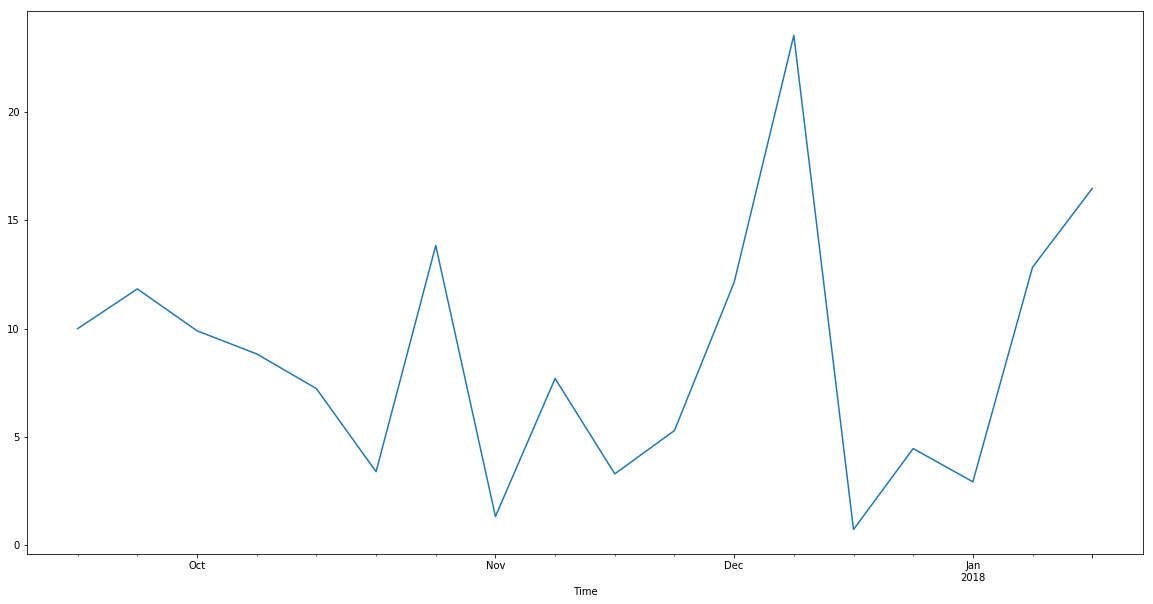

In [27]:
WeeklySummary =  getWeeklySummary()    
# print( WeeklySummary.head(20) )
WeeklySummary.mean().transpose().plot(figsize=(20,10))

WeeklySummary

# **`Plot daily avarage click count`**

**Generate daily based view sum:**

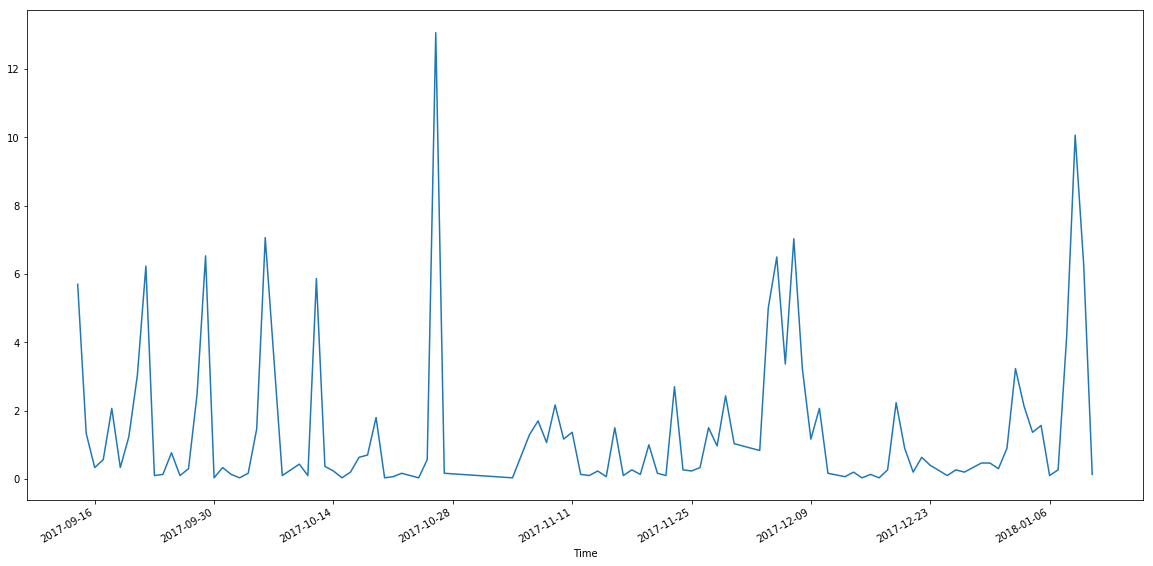

In [28]:
DailySummary = getDailySummary()
# print( DailySummary.head(50) )
DailySummary.mean().transpose().plot(figsize=(20,10))

# **Join Activity and Grades for further analysis **

In [29]:
Final = Grades.merge(TermSummary, how='left', on=StdCol)
Final = Final.merge(SA, how='left', on=StdCol)
Final = Final.merge(ActiveDaysCount, how='left', on=StdCol)
Final = Final.merge(LInactivityPeriod, how='left', on=StdCol)
Final = Final.merge(AccessDuration, how='left', on=StdCol)
Final = Final.merge(StudentResourceView, how='left', on=StdCol)
Final = Final.merge(WeeklyAccessCount, how='left', on=StdCol)



# Final.sort_values(FGradeCol,ascending=False)

#Grades



**Plot pairwise relations between overall grade and views&marks columns**

In [30]:
Final._get_numeric_data()

# Final['Overall'] = ((Final['Total CA (out of 50)'] * 2) + Final['Exam'] )/2
Final = Final.dropna(subset=['lms_Count_System'])
Final.fillna(-100, inplace=True)

#Final.drop([	'lms_diff11',	'lms_diff12'	,'lms_diff13'	,'lms_diff14'	,'lms_diff15'	,'lms_diff16'	,'lms_diff17'])


Final

,newID,CAgrade,ExamGrade,FInalGrade,lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,lms_Count_Quiz,lms_Count_System,lms_Count_URL,lms_Assignment1_delay,lms_ActiveDaysCount,lms_LInactivityPeriod,lms_AccessDuration,lms_RescourceViewCount,lms_ActiveWeekCount
0,A01,53.8,20.0,35.1,49.0,9.0,0.0,3.0,7.0,37.0,3.0,0.0,13,39.656944,110,40,8
1,A02,54.5,26.0,37.4,265.0,30.0,0.0,8.0,15.0,125.0,4.0,0.0,35,20.989583,117,46,15
2,A03,18.3,1.0,7.9,40.0,3.0,0.0,0.0,9.0,16.0,0.0,-100.0,5,7.003472,22,32,4
3,A04,49.3,8.0,24.5,59.0,26.0,0.0,0.0,6.0,47.0,6.0,0.0,30,20.534028,118,31,15
4,A05,80.5,64.0,70.6,61.0,9.0,0.0,1.0,5.0,33.0,0.0,0.0,13,25.964583,108,36,11
5,A06,62.5,26.0,40.6,42.0,4.0,0.0,0.0,10.0,28.0,0.0,0.0,12,34.982639,103,28,8
6,A07,77.6,61.0,67.6,109.0,15.0,0.0,2.0,5.0,59.0,7.0,0.0,30,12.174306,118,41,16
7,A08,70.3,70.0,70.1,73.0,8.0,2.0,10.0,16.0,61.0,6.0,0.0,27,15.731250,121,42,15
8,A09,66.8,35.0,47.7,100.0,5.0,0.0,0.0,11.0,42.0,3.0,0.0,19,29.100000,118,41,11
9,A10,77.5,68.0,71.8,72.0,10.0,0.0,9.0,9.0,87.0,2.0,0.0,42,10.197222,116,51,16


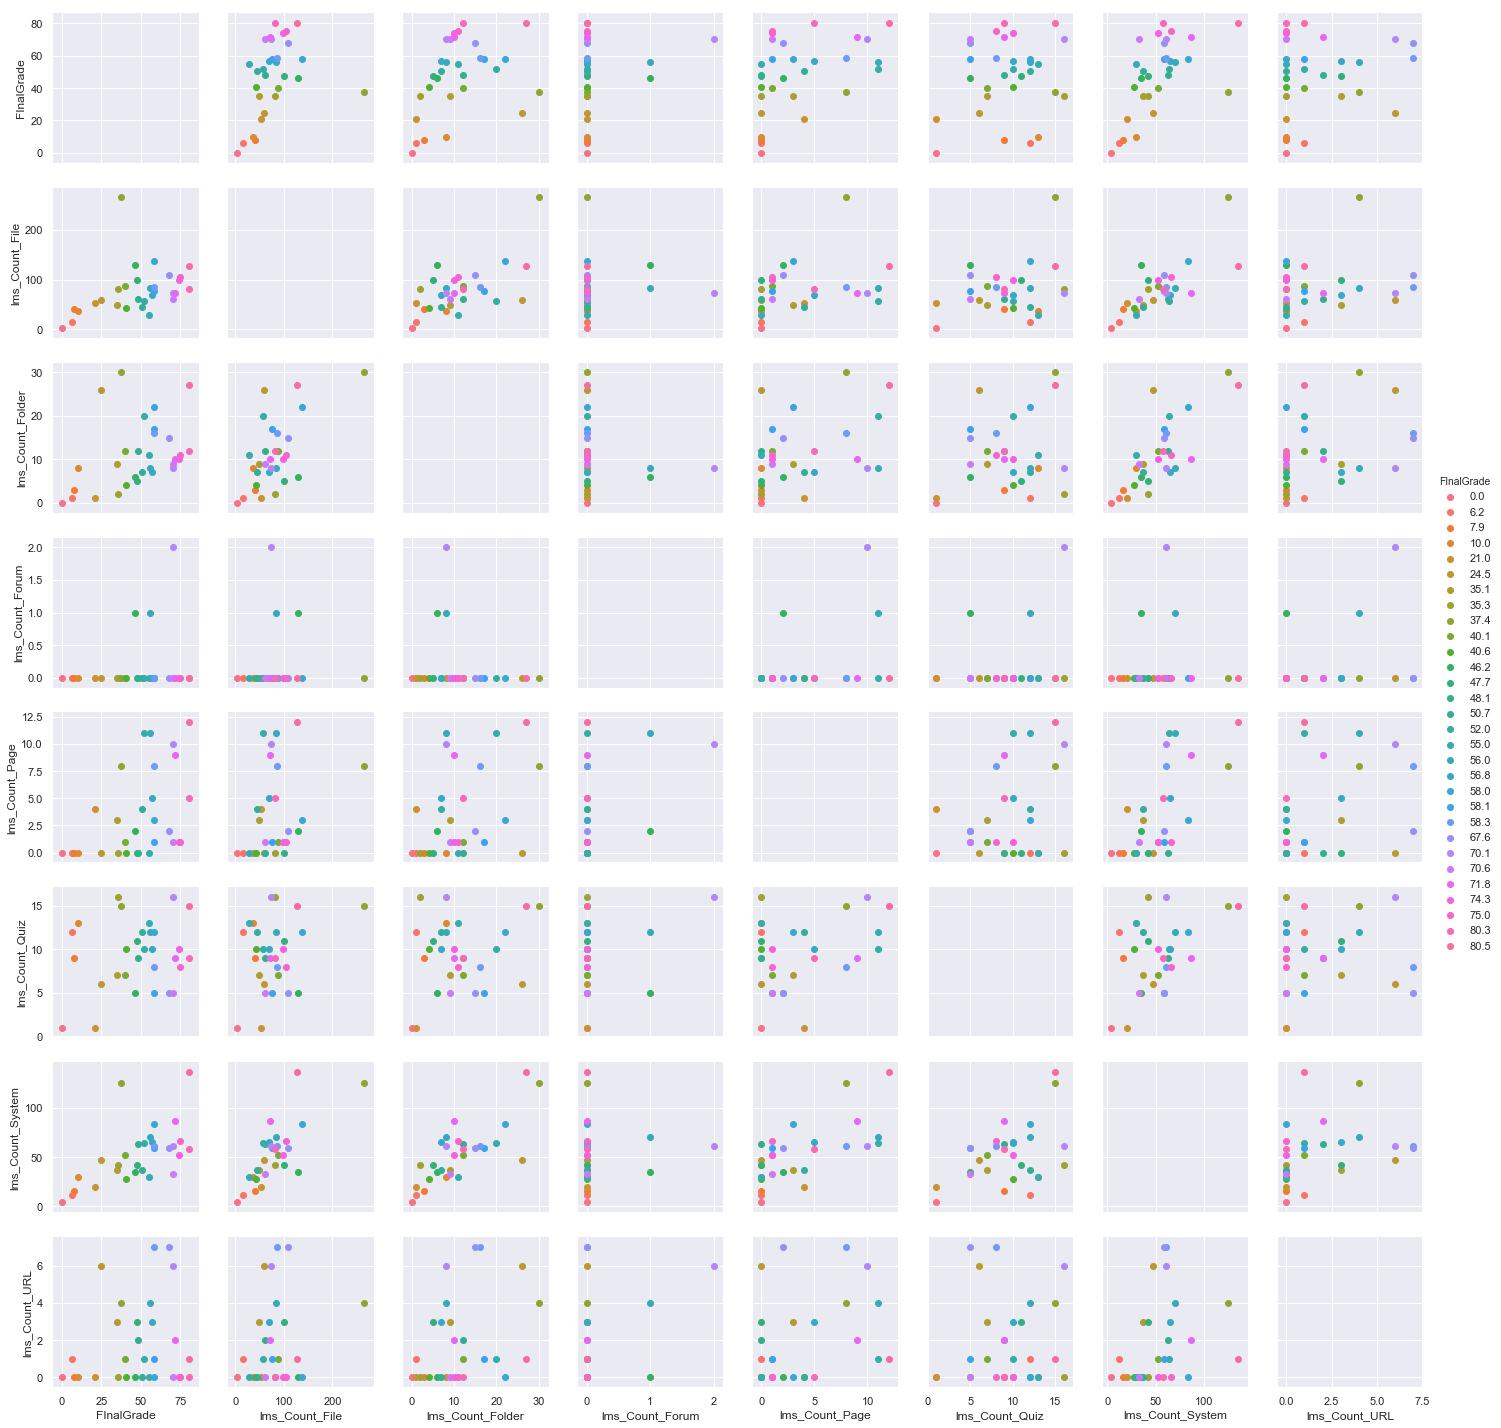

In [31]:
sns.set()
filter_col = [col for col in Final if col.startswith('lms_C') or col.startswith(FGradeCol)]
X = pd.DataFrame( Final[filter_col])
g = sns.PairGrid(X, hue=FGradeCol)
g.map_offdiag(plt.scatter)
g.add_legend();


**Check Correlation:**

In [32]:
xx = pd.DataFrame( Final._get_numeric_data().corr(method='spearman')) 

filter_col = [col for col in xx if col.startswith('lms_')]

xx = xx[filter_col]

cm = sns.light_palette("green", as_cmap=True)

xx.loc[xx.index == FGradeCol].style.format("{:.3}").background_gradient(cmap=cm, axis=1)

,lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,lms_Count_Quiz,lms_Count_System,lms_Count_URL,lms_Assignment1_delay,lms_ActiveDaysCount,lms_LInactivityPeriod,lms_AccessDuration,lms_RescourceViewCount,lms_ActiveWeekCount
FInalGrade,0.546,0.497,0.104,0.541,0.0789,0.648,0.109,0.635,0.6,-0.176,0.591,0.523,0.583


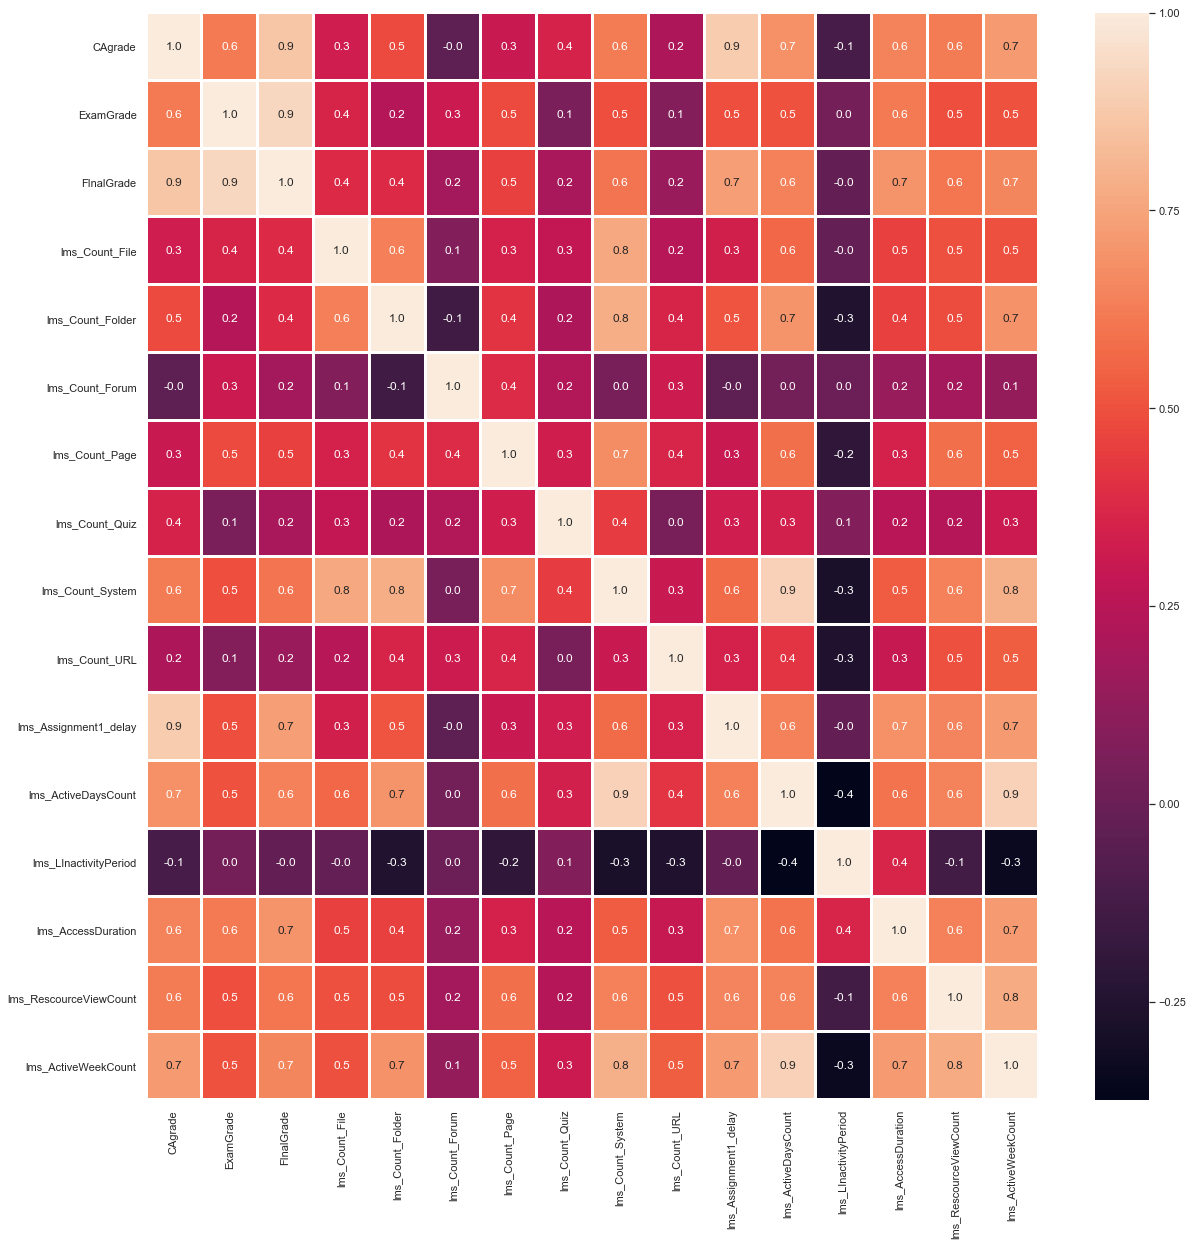

In [33]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(Final._get_numeric_data().corr(), annot=True, linewidths=2, fmt= '.1f')
plt.show() # eliminates the black-white line

# Create major groupings

Avarage activity by group based on overall grade. A is hiegest.

In [34]:
Final['Group'] = ''
Final[ "Group Name"]= ''
# Final = Final.copy()

for item, row in Final.iterrows(): 
  if Final.loc[item, FGradeCol] >= 75 :
     Final.loc[item, "Group"]= 1
     Final.loc[item, "Group Name"]= 'A'
  elif Final.loc[item, FGradeCol] >= 40 :
     Final.loc[item, "Group"]= 2
     Final.loc[item, "Group Name"]= 'B'
  else:
     Final.loc[item, "Group"]= 3
     Final.loc[item, "Group Name"]= 'C'
      
#Final

In [35]:
x = (Final.groupby(['Group Name'], as_index=False).mean())
# x['lms_all']= x['lms_C_File']+x['lms_C_Folder']+x['lms_C_Forum']+x['lms_C_URL']+x['lms_C_System']
# x
# pd.set_option('display.max_columns', 500)
x['lms_all'] = x[[col for col in Final if col.startswith('lms_Count_')]].sum(axis=1)

x.set_index("Group Name",inplace=True)
x

,CAgrade,ExamGrade,FInalGrade,lms_Count_File,lms_Count_Folder,lms_Count_Forum,lms_Count_Page,lms_Count_Quiz,lms_Count_System,lms_Count_URL,lms_Assignment1_delay,lms_ActiveDaysCount,lms_LInactivityPeriod,lms_AccessDuration,lms_RescourceViewCount,lms_ActiveWeekCount,Group,lms_all
Group Name,,,,,,,,,,,,,,,,,,
A,83.466667,74.666667,78.600000,105.000000,16.666667,0.000000,6.000000,10.666667,86.666667,0.333333,0.000000,32.333333,25.244676,117.333333,34.666667,12.333333,1.0,225.333333
B,68.216667,49.000000,56.777778,78.611111,11.055556,0.222222,3.833333,9.388889,54.555556,2.055556,-5.555556,23.555556,21.465702,115.666667,39.666667,12.944444,2.0,159.722222
C,31.000000,11.888889,19.711111,66.666667,8.888889,0.000000,1.666667,8.888889,37.000000,1.555556,-55.555556,15.000000,24.460494,83.333333,27.666667,8.444444,3.0,124.666667


**Student Moodle Resources View by Student Group**


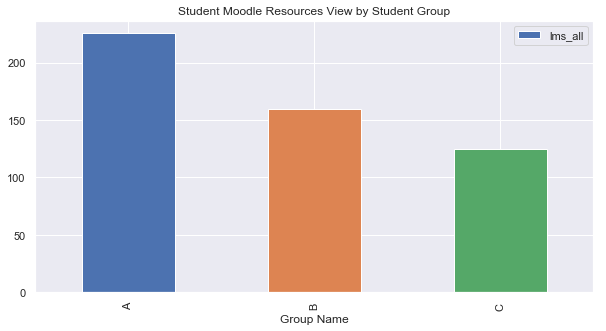

In [36]:
x.plot.bar( y='lms_all' ,figsize=(10,5), title='Student Moodle Resources View by Student Group'  )


**Student Moodle Course Access Rate by Student Grade**

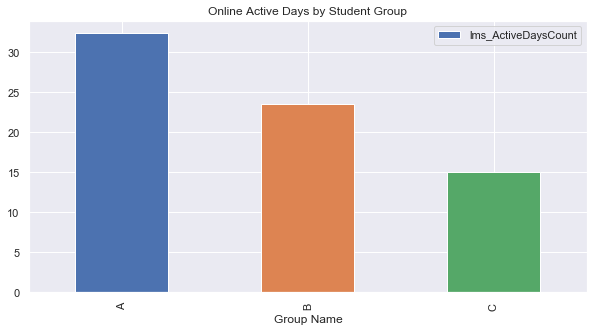

In [37]:
x.plot.bar(y='lms_ActiveDaysCount' ,figsize=(10,5), title='Online Active Days by Student Group'  )


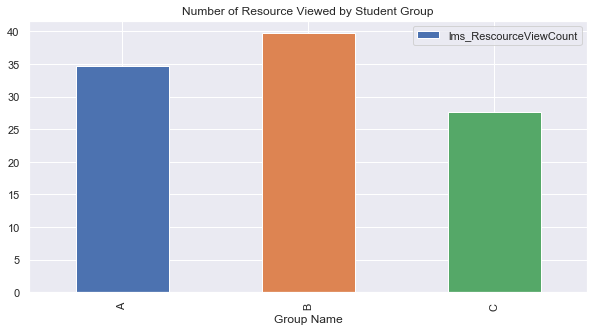

In [38]:
x.plot.bar(y='lms_RescourceViewCount' ,figsize=(10,5), title='Number of Resource Viewed by Student Group'  )


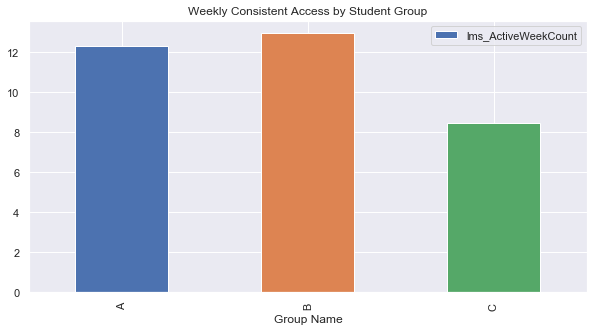

In [39]:
x.plot.bar(y='lms_ActiveWeekCount' ,figsize=(10,5), title='Weekly Consistent Access by Student Group'  )


# Decision Tree Analysis

In [57]:
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [58]:
# All clumns incuding grades
# filter_col = Final._get_numeric_data().columns.difference(['Grade','Group',FGradeCol])
# X = pd.DataFrame(Final[filter_col])


# only LMS data
filter_col = [col for col in Final if col.startswith('lms_')]
X = Final[filter_col]


Y = Final['Group']

X.fillna('-20', inplace=True)
filter_col

['lms_Count_File',
 'lms_Count_Folder',
 'lms_Count_Forum',
 'lms_Count_Page',
 'lms_Count_Quiz',
 'lms_Count_System',
 'lms_Count_URL',
 'lms_Assignment1_delay',
 'lms_ActiveDaysCount',
 'lms_LInactivityPeriod',
 'lms_AccessDuration',
 'lms_RescourceViewCount',
 'lms_ActiveWeekCount']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.6, random_state = 100)

In [60]:
#clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)

clf_gini = DecisionTreeClassifier()
clf_gini.fit(X_train, Y_train)


#classifier = DecisionTreeClassifier()  
#classifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
#Y

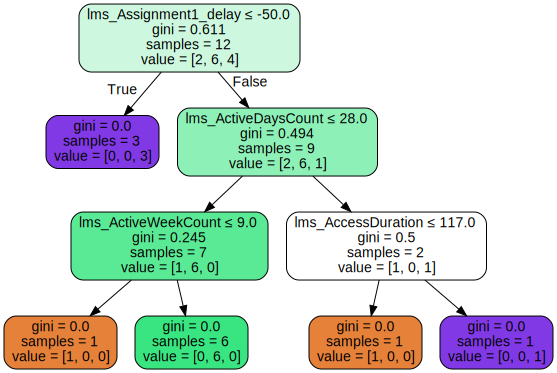

In [62]:
feature_names = list(X.columns)
#class_names   = ["C","B","A"]

#class_names = class_names,

dot_data = tree.export_graphviz(clf_gini, out_file=None,                         
                         feature_names=feature_names,  
                         
                         filled=True, rounded=True,  
                         special_characters=True)  


graph = graphviz.Source(dot_data)  
graph 

#class_names

In [63]:
y_pred = clf_gini.predict(X_test)  


In [64]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(Y_test, y_pred))  
print(classification_report(Y_test, y_pred))  


[[0 0 1]
 [2 7 3]
 [2 1 2]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          2       0.88      0.58      0.70        12
          3       0.33      0.40      0.36         5

avg / total       0.68      0.50      0.57        18



In [65]:
print ("Accuracy is ", accuracy_score(Y_test,y_pred)*100)

Accuracy is  50.0


In [66]:
#cccc = pd.DataFrame({'Predicted':y_pred,'Actual':Y_test })  
#cccc


# Regression Tree

In [67]:
#X = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff']])
#XX = pd.DataFrame(Final[[	 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1','AF']])

filter_col = [col for col in Final if col.startswith('lms_')]
X = pd.DataFrame(Final[filter_col])

Y = pd.DataFrame(Final[FGradeCol])

X.fillna('-20', inplace=True)
filter_col

['lms_Count_File',
 'lms_Count_Folder',
 'lms_Count_Forum',
 'lms_Count_Page',
 'lms_Count_Quiz',
 'lms_Count_System',
 'lms_Count_URL',
 'lms_Assignment1_delay',
 'lms_ActiveDaysCount',
 'lms_LInactivityPeriod',
 'lms_AccessDuration',
 'lms_RescourceViewCount',
 'lms_ActiveWeekCount']

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.6, random_state = 100)

In [69]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
y_pred = regressor.predict(X_test)  
y_pred

array([74.3, 74.3, 74.3, 24.5, 21. , 70.1, 75. , 74.3, 40.1, 55. , 21. ,
       21. , 24.5, 40.1, 24.5, 70.1, 75. , 75. ])

In [71]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred))) 

Mean Absolute Error: 21.07222222222222
Mean Squared Error: 561.116111111111
Root Mean Squared Error: 23.68788954531642


# Regression

In [72]:
#XX = pd.DataFrame(Final[[	'CAgrade', 'ExamGrade', 'File', 'Folder',	'Forum', 'Page', 'Quiz', 'System', 'URL', 'diff1']])

filter_col = [col for col in Final if col.startswith('lms_')]
X = pd.DataFrame(Final[filter_col])


Y = pd.DataFrame(Final[FGradeCol])

# X.fillna('-20', inplace=True)


In [73]:
import statsmodels.api as sm


#X = sm.add_constant(X) 

model = sm.OLS(Y, X.astype(float)).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:             FInalGrade   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     27.49
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           7.79e-09
Time:                        18:34:50   Log-Likelihood:                -115.18
No. Observations:                  30   AIC:                             256.4
Df Residuals:                      17   BIC:                             274.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
lms_Count_File            -0